In [1]:
from random import uniform
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons,make_s_curve
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.neural_network import MLPClassifier


# A. Function to Draw decision Boundary of MLP

In [2]:
def plot_decision_boundary(clf, X, Y,file_name):
    cmap='Paired_r'
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');
    plt.savefig(file_name)

# B. Scoring Function.

In [3]:
def micro_scoring():
    pr=precision_score(y_test, predicted, average='micro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted, average='micro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted, average='micro') 
    print ('\n F-measure:'+str(fm))
    return();            
    
def macro_scoring():
    pr=precision_score(y_test, predicted, average='macro')
    print ('\n Precision:'+str(pr))
    re=recall_score(y_test, predicted, average='macro')
    print ('\n Recall:'+str(re))
    fm=f1_score(y_test, predicted, average='macro') 
    print ('\n F-measure:'+str(fm))
    return();
def evolution():
    print ('\n Confusion Matrix \n')
    print (confusion_matrix(y_test,predicted))
    choice =-1
    print("Choose a Scoring technique")
    choice="1"
    #choice=input("1. Micro Scoring   2. Macro Scoring: ")
    if choice=="1":
        micro_scoring()
    elif choice=="2":
        macro_scoring()

In [11]:
def twospirals(n_points, noise=1,twist=780):
    """
     To make  two  intertwingling spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * twist * (2*np.pi)/360
    d1x = np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = -np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))



# 1. Dataset 1:

ENTER THE NO OF DATA POINTS: 2000


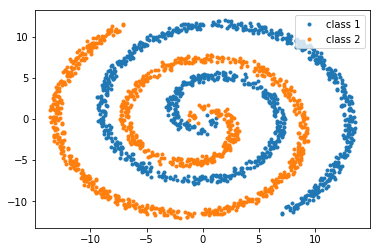

In [12]:
n = input("ENTER THE NO OF DATA POINTS: ")
X, y = twospirals(int(int(n)/2))
plt.plot(X[y==0,0],X[y==0,1],'.',label='class 1')
plt.plot(X[y==1,0],X[y==1,1],'.',label='class 2')
plt.legend()
plt.savefig('spiral_data1.png')

# 1.1 spliting test and training set

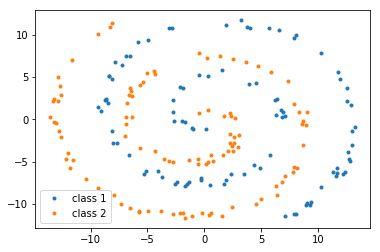

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

plt.plot(X_test[y_test==0,0],X_test[y_test==0,1],'.',label='class 1')
plt.plot(X_test[y_test==1,0],X_test[y_test==1,1],'.',label='class 2')
plt.legend()
plt.savefig('spiral_test_data1.png')

# 1.3 classify Dataset 1 using svm

In [7]:
list_C = np.arange(1,10,1)
clf = svm.SVC(gamma='auto')
parameters = {
        'kernel':['rbf','poly','sigmoid'],
        'gamma':['auto','scale'],
        'decision_function_shape':['ovo', 'ovr']
        
        }
gs_clf=GridSearchCV(clf,parameters,cv=5,scoring='f1_macro')
gs_clf.fit(X_train,y_train)
gs_clf_b=gs_clf.best_estimator_
print (gs_clf.best_estimator_)
predicted = gs_clf_b.predict(X_test)
predicted = list(predicted)
evolution()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 Confusion Matrix 

[[ 96   0]
 [  0 104]]
Choose a Scoring technique

 Precision:1.0

 Recall:1.0

 F-measure:1.0


# 1.4 plotting decision boundary of svm

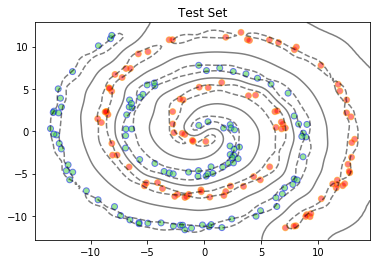

In [8]:
ax = None


colour= ['r' if i==0 else 'limegreen' for i in y_test] 
plt.title('Test Set')
plot1 = plt.scatter(X_test[:, 0], X_test[:, 1],color=colour,alpha=0.5,edgecolor=['orange' if i==0 else 'blue' for i in y_test])


if ax is None:
    ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
x1 = np.linspace(xlim[0], xlim[1], 100)
y1 = np.linspace(ylim[0], ylim[1], 100)
Y1, X1 = np.meshgrid(y1, x1)
xy = np.vstack([X1.ravel(), Y1.ravel()]).T
P1 = gs_clf_b.decision_function(xy).reshape(X1.shape)

# plot decision boundary and margin

ax.contour(X1, Y1, P1, colors='k',
           levels=[-1,0,1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.savefig('spiral_SVM_DB1.png')

# 1.5 classifing Dataset 1 using MLP

In [9]:
clf_mlp = MLPClassifier(max_iter=3000)
parameters = {
            'hidden_layer_sizes':[(20),(15,20),(15,15,10)],
            'activation':['tanh','relu','identity','logistic'],
            'solver':['lbfgs', 'sgd', 'adam'],
            }
gs_clf_mlp=GridSearchCV(clf_mlp,parameters,cv=10)
gs_clf_mlp.fit(X_train,y_train)
gs_clf_mlp_b=gs_clf_mlp.best_estimator_
print (gs_clf_mlp_b)
predicted = gs_clf_mlp_b.predict(X_test)
predicted = list(predicted)
evolution()

/home/sysadm/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 15, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=3000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

 Confusion Matrix 

[[ 95   1]
 [  1 103]]
Choose a Scoring technique

 Precision:0.99

 Recall:0.99

 F-measure:0.99


# Plotting decision boundary of MLP of the dataset 1

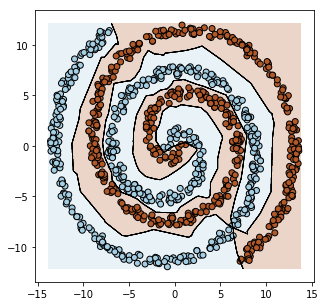

In [10]:
plot_decision_boundary(gs_clf_mlp_b, X, y,file_name='spiral_MLP_DB1Train.png')


# 2. Dataset 2: 

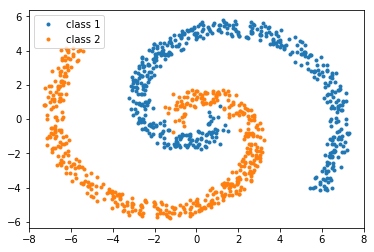

In [11]:
X,y=twospirals(int(int(n)/2),twist=400)
plt.plot(X[y==0,0],X[y==0,1],'.',label='class 1')
plt.plot(X[y==1,0],X[y==1,1],'.',label='class 2')
plt.legend()

plt.savefig('spiral_data2.png')

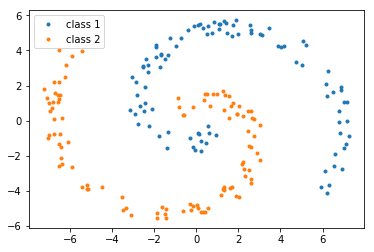

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

plt.plot(X_test[y_test==0,0],X_test[y_test==0,1],'.',label='class 1')
plt.plot(X_test[y_test==1,0],X_test[y_test==1,1],'.',label='class 2')
plt.legend()
plt.savefig('spiral_test_data2.png')

In [13]:
list_C = np.arange(1,10,1)
clf = svm.SVC(kernel='rbf',gamma='auto')
parameters = {
        'C':list_C,
        'kernel':['rbf','poly','sigmoid'],
        'gamma':['auto','scale'],
        'decision_function_shape':['ovo', 'ovr']
        }
gs_clf=GridSearchCV(clf,parameters,cv=5,scoring='f1_macro')
gs_clf.fit(X_train,y_train)
gs_clf_b=gs_clf.best_estimator_
print (gs_clf.best_estimator_)
predicted = gs_clf_b.predict(X_test)
predicted = list(predicted)
evolution()

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 Confusion Matrix 

[[ 96   0]
 [  0 104]]
Choose a Scoring technique

 Precision:1.0

 Recall:1.0

 F-measure:1.0


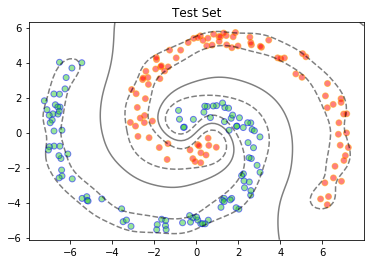

In [14]:
ax = None


colour= ['r' if i==0 else 'limegreen' for i in y_test] 
plt.title('Test Set')
plot1 = plt.scatter(X_test[:, 0], X_test[:, 1],color=colour,alpha=0.5,edgecolor=['orange' if i==0 else 'blue' for i in y_test])


if ax is None:
    ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
x1 = np.linspace(xlim[0], xlim[1], 100)
y1 = np.linspace(ylim[0], ylim[1], 100)
Y1, X1 = np.meshgrid(y1, x1)
xy = np.vstack([X1.ravel(), Y1.ravel()]).T
P1 = gs_clf_b.decision_function(xy).reshape(X1.shape)

# plot decision boundary and margin

ax.contour(X1, Y1, P1, colors='k',
           levels=[-1,0,1], alpha=0.5,
           linestyles=['--', '-', '--'])
plt.savefig('spiral_SVM_DB2.png')

In [15]:

clf_mlp = MLPClassifier(max_iter=3000)
parameters = {
            'hidden_layer_sizes':[(20),(15,20),(10,10,10)],
            'activation':['tanh','relu','identity','logistic'],
            'solver':['lbfgs', 'sgd', 'adam'],
            
            }
gs_clf_mlp=GridSearchCV(clf_mlp,parameters,cv=10)
gs_clf_mlp.fit(X_train,y_train)
gs_clf_mlp_b=gs_clf_mlp.best_estimator_
print (gs_clf_mlp_b)
predicted = gs_clf_mlp_b.predict(X_test)
predicted = list(predicted)
evolution()

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=3000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

 Confusion Matrix 

[[ 96   0]
 [  0 104]]
Choose a Scoring technique

 Precision:1.0

 Recall:1.0

 F-measure:1.0


/home/sysadm/.local/lib/python3.5/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


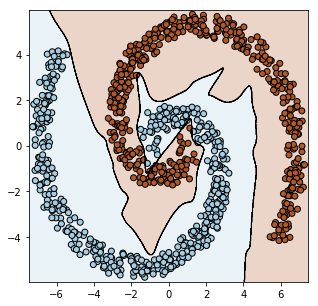

In [16]:
plt=plot_decision_boundary(gs_clf_mlp_b, X, y,file_name='spiral_MLP_DB2.png')
